In [1]:
import os
import pandas as pd
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/AllElectronics.csv',encoding='gbk', skipinitialspace=True) #, skipinitialspace=True cannot be less
data.head()

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes


In [3]:
X = data.iloc[:,:-1]
X

,RID,age,income,student,credit_rating
0,1,youth,high,no,fair
1,2,youth,high,no,excellent
2,3,middle_aged,high,no,fair
3,4,senior,medium,no,fair
4,5,senior,low,yes,fair
5,6,senior,low,yes,excellent
6,7,middle_aged,low,yes,excellent
7,8,youth,medium,no,fair
8,9,youth,low,yes,fair
9,10,senior,medium,yes,fair


In [4]:
y = data.iloc[:,5]
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: class_buys_computer, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,RID,age,income,student,credit_rating
0,0,2,0,0,1
1,1,2,0,0,0
2,2,0,0,0,1
3,3,1,2,0,1
4,4,1,1,1,1
5,5,1,1,1,0
6,6,0,1,1,0
7,7,2,2,0,1
8,8,2,1,1,1
9,9,1,2,1,1


In [6]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
regressor = DecisionTreeClassifier()
regressor.fit(X.iloc[:,1:5],y)
X_in = np.array([1,1,0,0])
y_pred= regressor.predict([X_in])
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['no'], dtype=object)

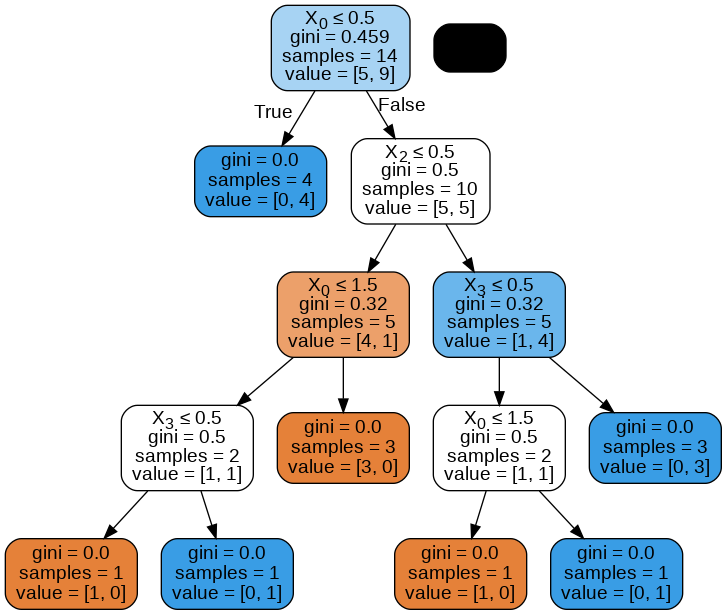

In [7]:
import cv2 
from google.colab.patches import cv2_imshow
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor , out_file=dot_data,filled=True ,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
i = graph.write_png('Tree_Buy_Computer.png')
img = cv2.imread('/content/Tree_Buy_Computer.png')
cv2_imshow(img);